In [43]:
library(igraph)
library(ggplot2)
set.seed(0)

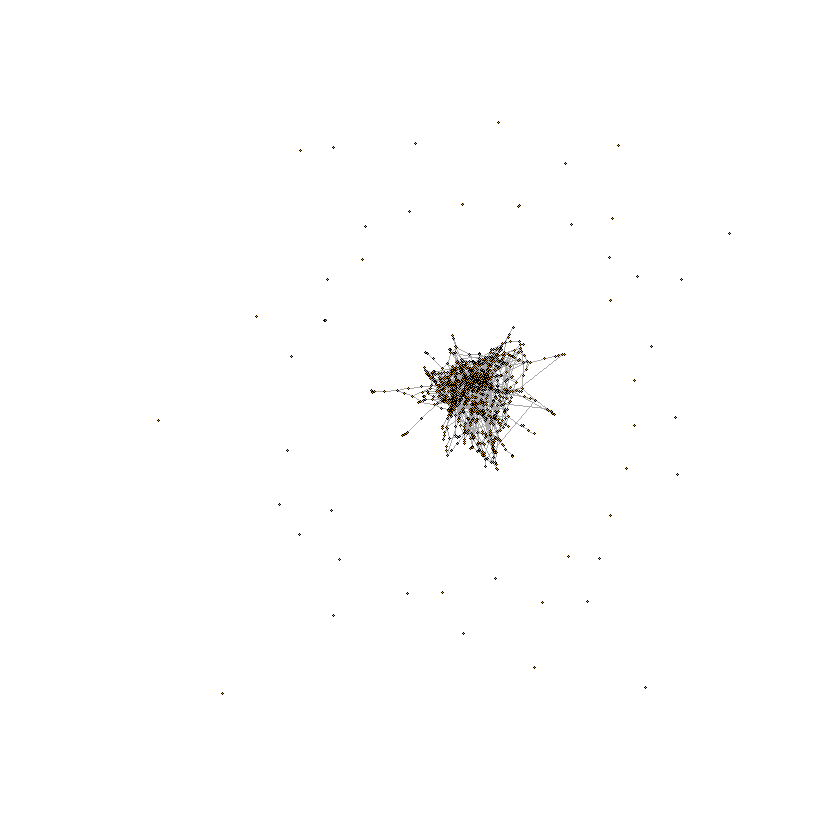

[1] "The mean of degree distribution is 2.97"
[1] "The variance of degree distribution is 2.73583583583584"


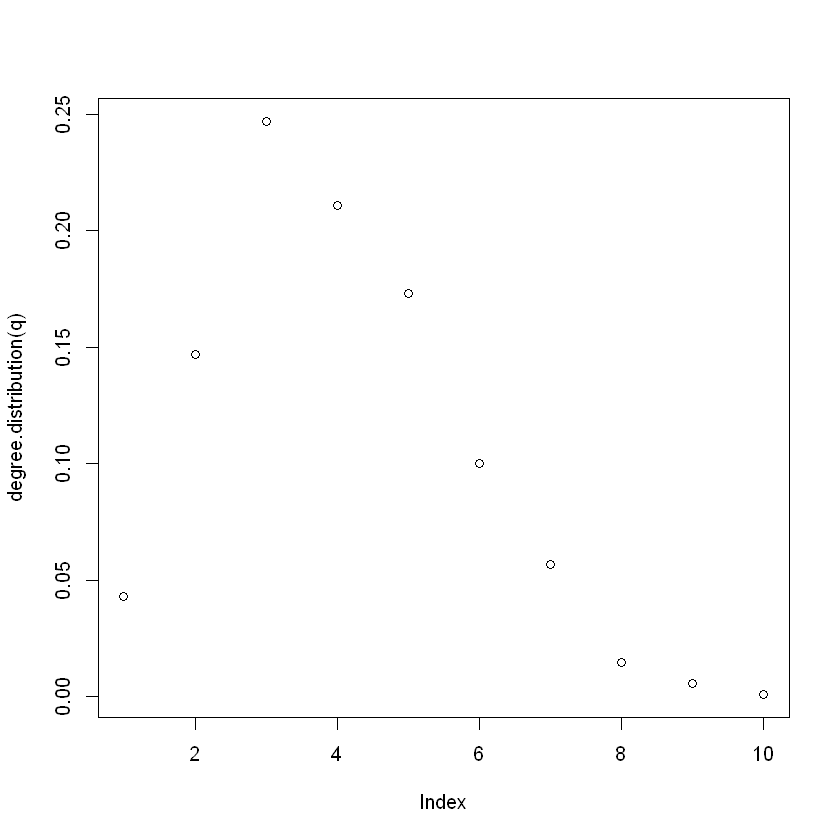

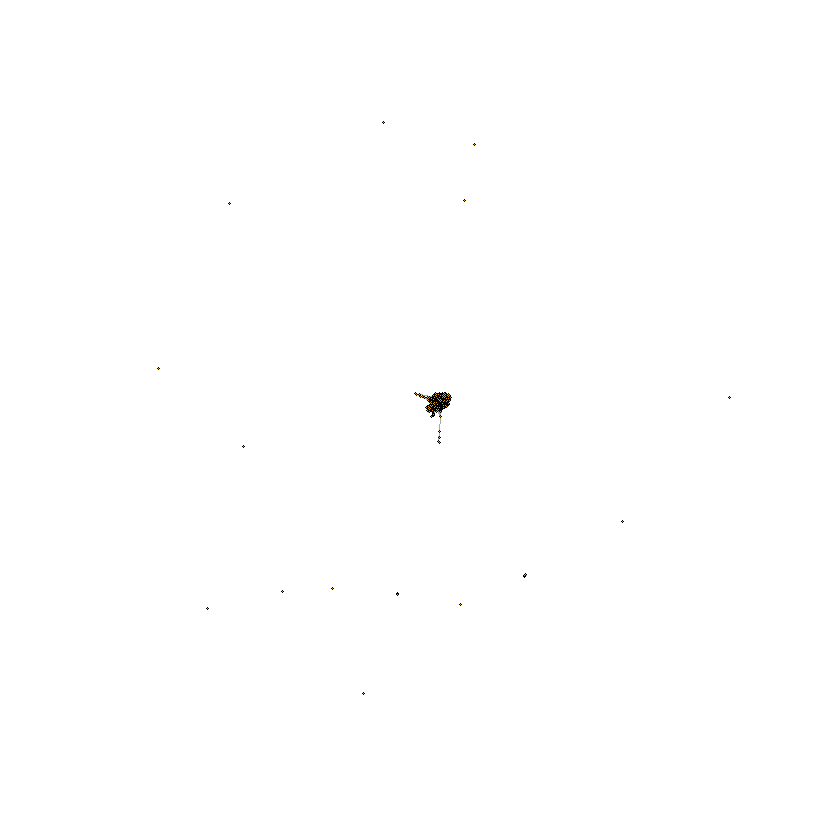

[1] "The mean of degree distribution is 4.094"
[1] "The variance of degree distribution is 4.11327727727728"


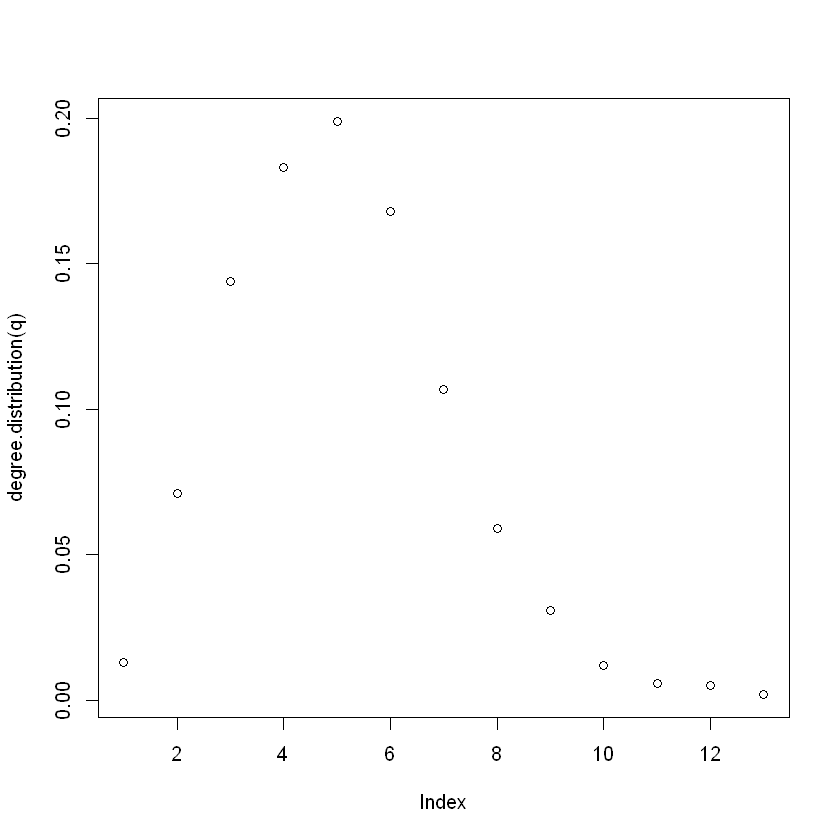

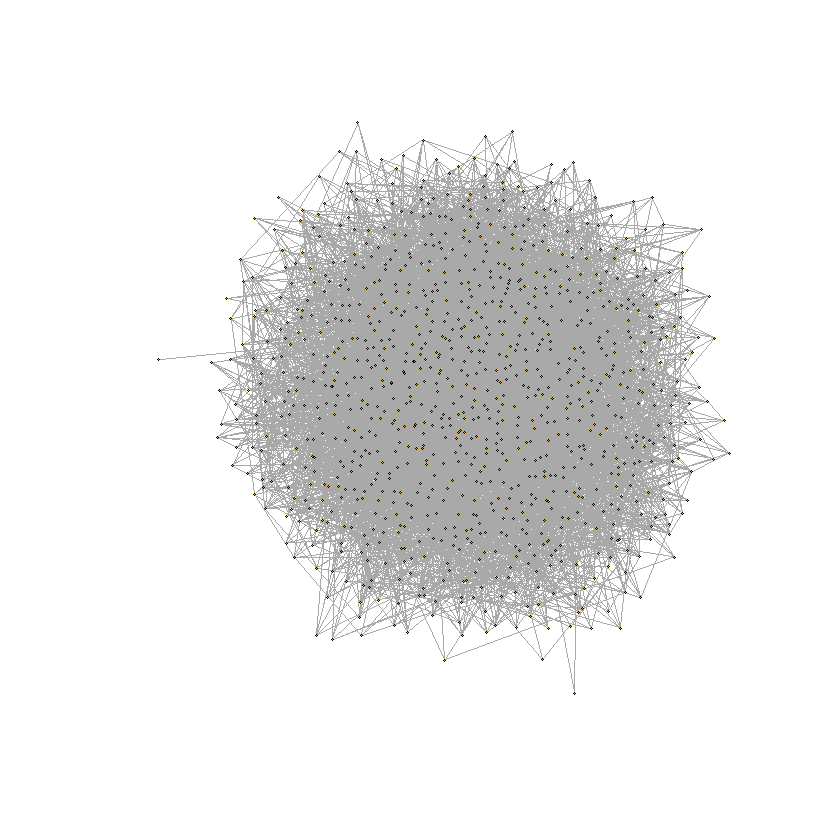

[1] "The mean of degree distribution is 10.364"
[1] "The variance of degree distribution is 9.9995035035035"


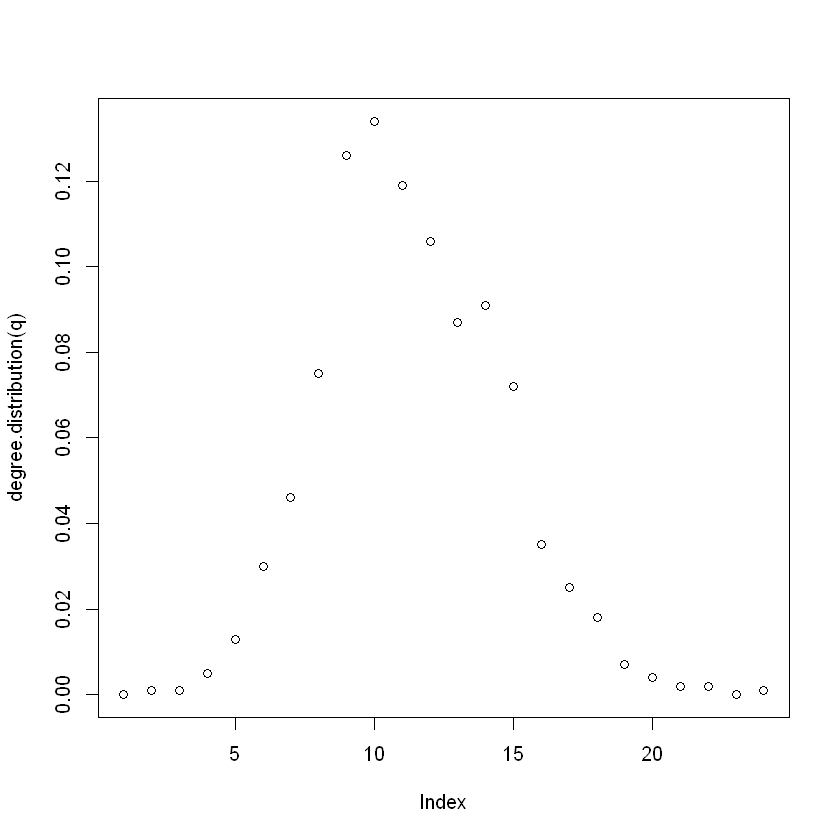

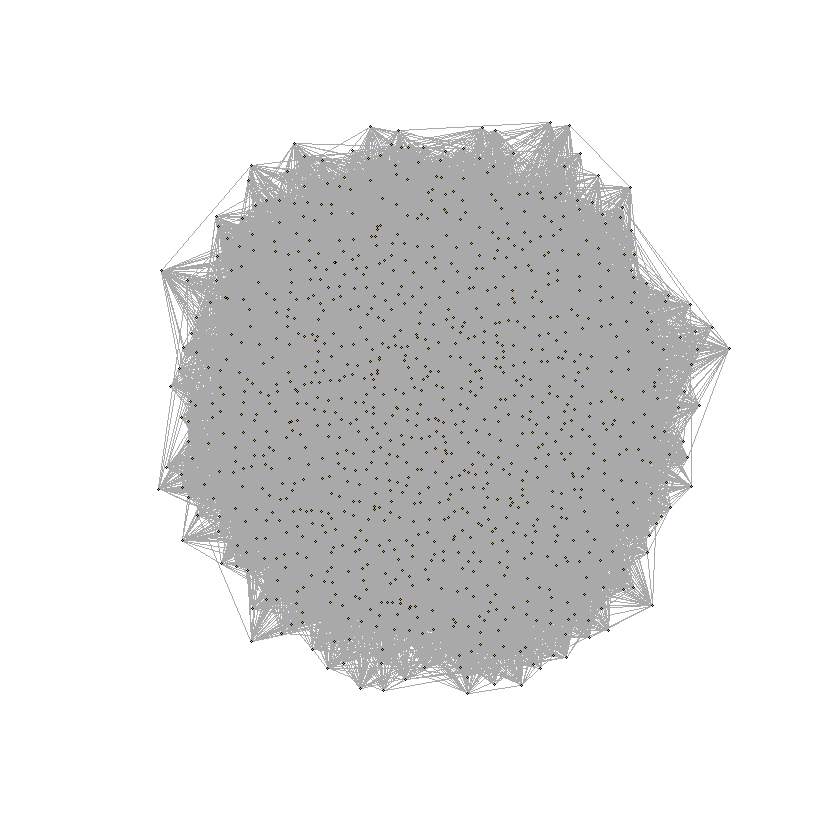

[1] "The mean of degree distribution is 49.82"
[1] "The variance of degree distribution is 47.4510510510511"


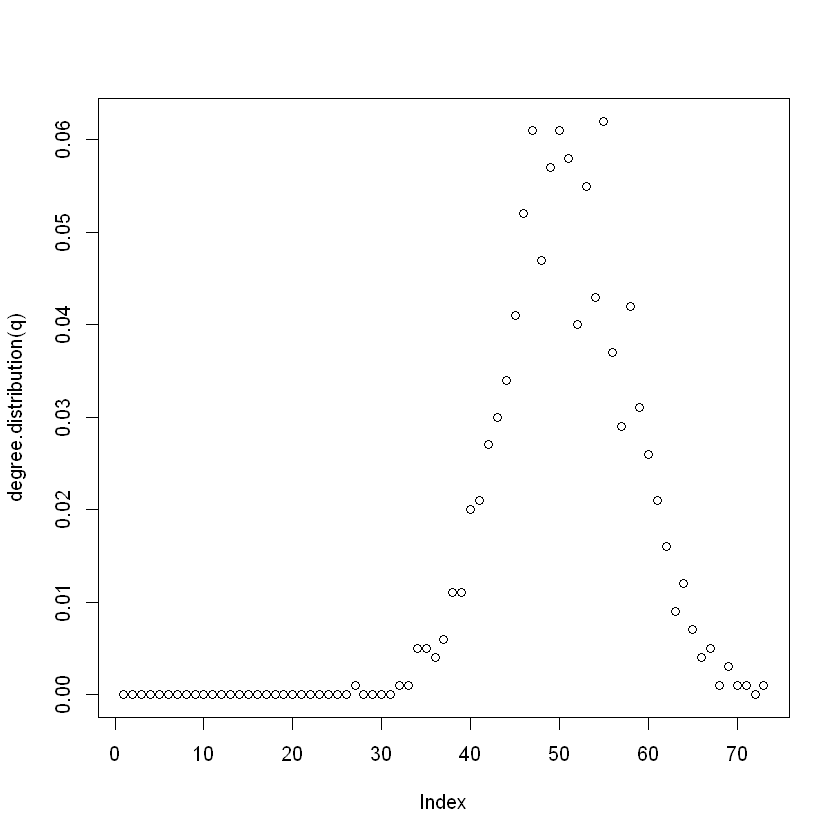

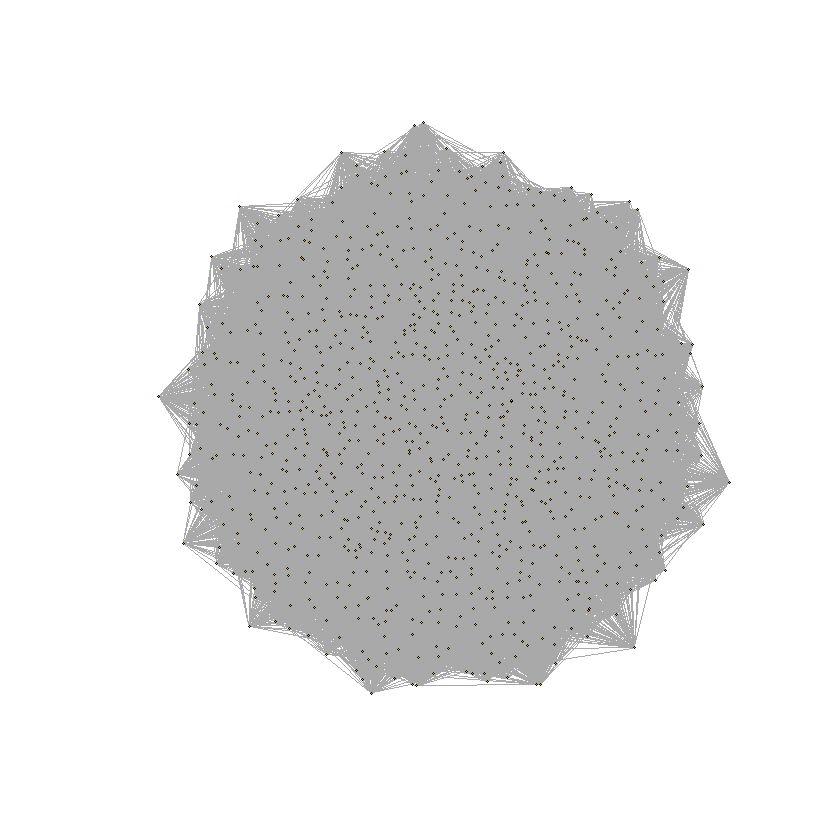

[1] "The mean of degree distribution is 100.192"
[1] "The variance of degree distribution is 89.3124484484484"


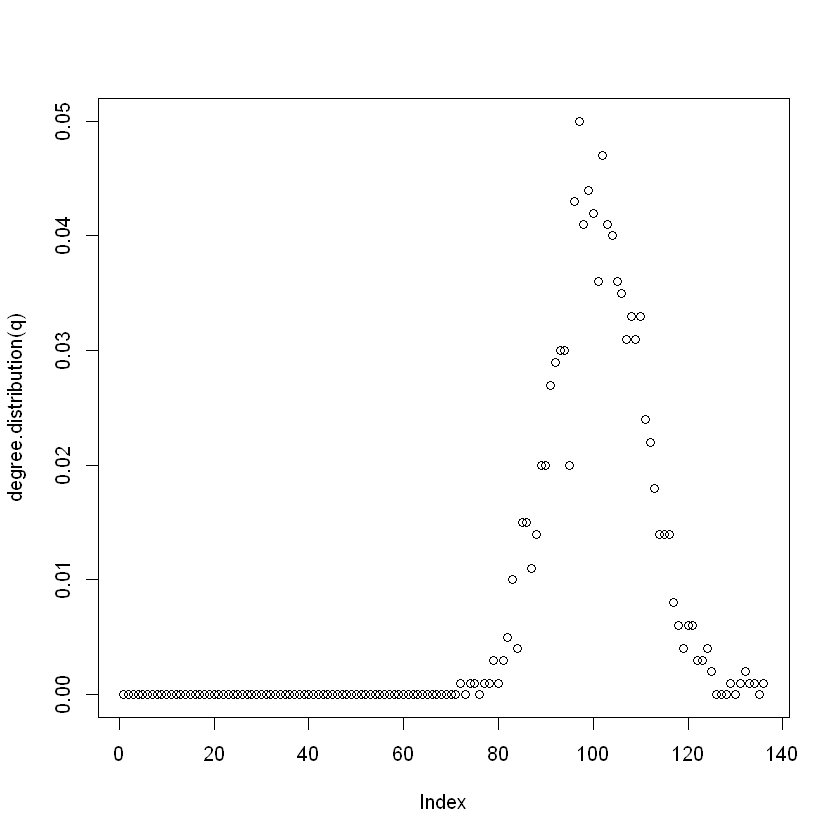

In [42]:
#Question 1a
for (p in c(0.003,0.004,0.01,0.05,0.1)){
    q = erdos.renyi.game(1000,p=p,directed = F)
    plot(q, vertex.size=1, vertex.label=NA)
    plot(degree.distribution(q))
    print(paste("The mean of degree distribution is", mean(degree(q))))
    print(paste("The variance of degree distribution is", var(degree(q))))
}

[1] "Is the graph connected? FALSE"
[1] "The diameter of GCC is 13"
[1] "Is the graph connected? FALSE"


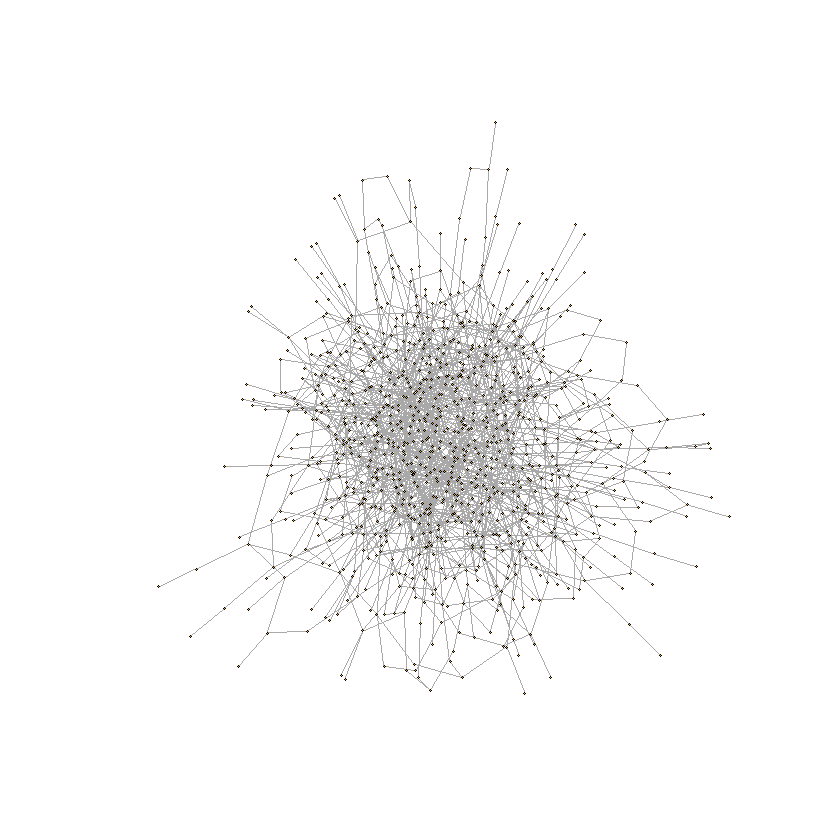

[1] "The diameter of GCC is 11"
[1] "Is the graph connected? TRUE"


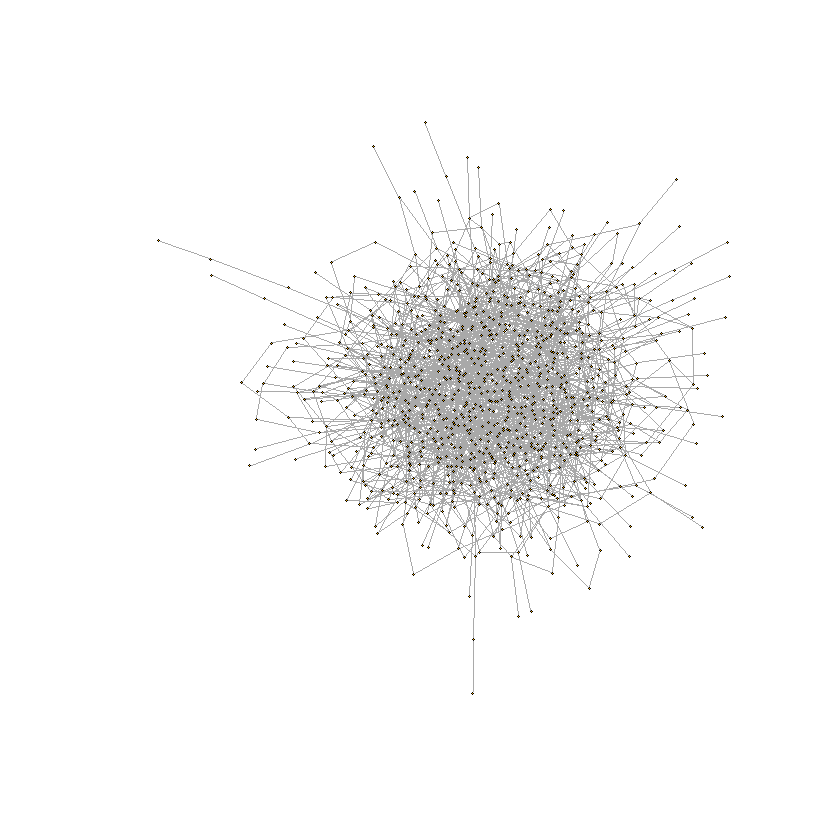

[1] "The diameter of GCC is 5"
[1] "Is the graph connected? TRUE"


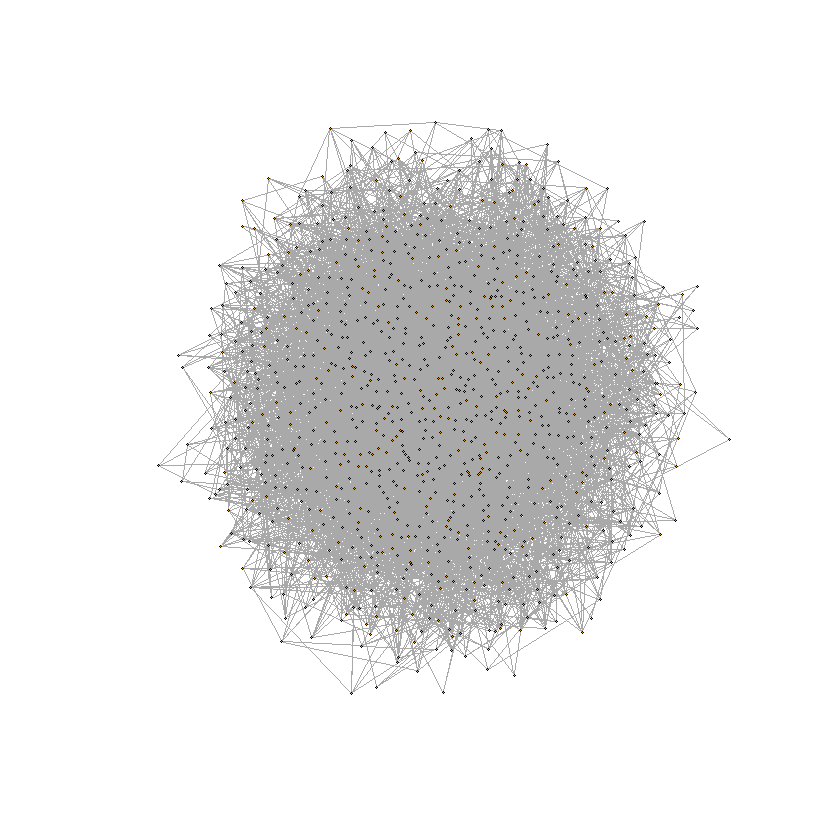

[1] "The diameter of GCC is 3"
[1] "Is the graph connected? TRUE"


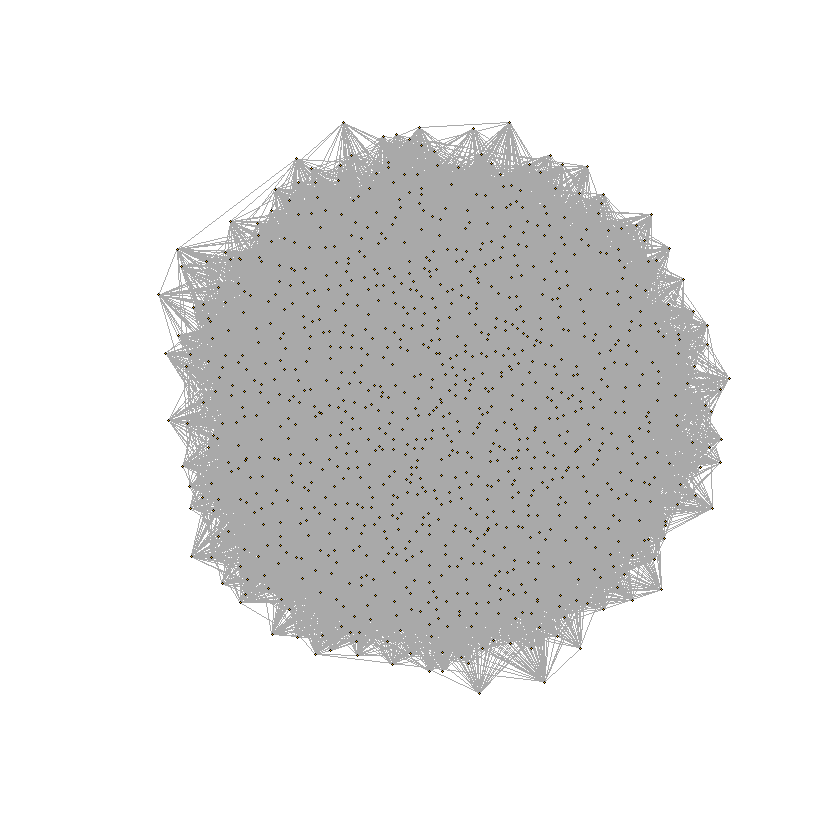

[1] "The diameter of GCC is 3"


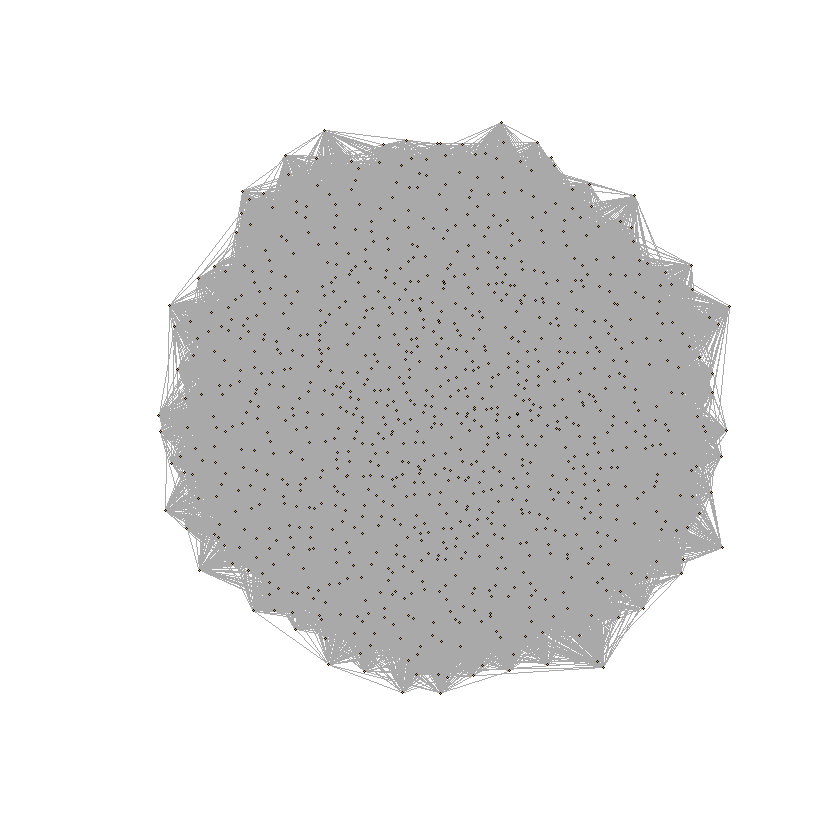

In [6]:
#Question 1b
for (p in c(0.003,0.004,0.01,0.05,0.1)){
    q = erdos.renyi.game(1000,p=p,directed = F)
    print(paste('Is the graph connected?', is.connected(q)))
    c <- clusters(q)
    subq <- induced.subgraph(q, which(c$membership == which.max(c$csize)))
    plot(subq, vertex.size=1, vertex.label=NA)
    print(paste('The diameter of GCC is', diameter(subq)))
}

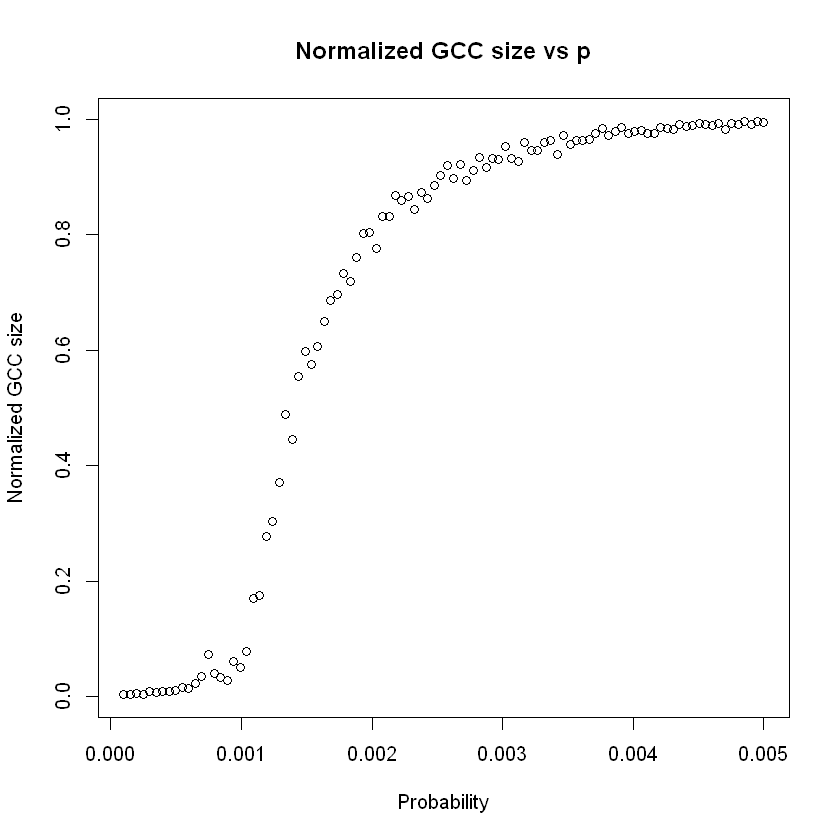

In [37]:
#Question 1c
probs <- seq(from = 0.0001, to = 0.005,length.out = 100)
norm_gcc <-vector("list", 100)
i<-1
for (p in probs){
    q = erdos.renyi.game(1000,p=p,directed = F)
    gcc <- max(clusters(q)$csize)/1000
    norm_gcc[[i]] <- gcc
    i <- i + 1
}
plot(x=probs,y=norm_gcc,main='Normalized GCC size vs p', xlab = 'Probability', ylab = 'Normalized GCC size')


Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"

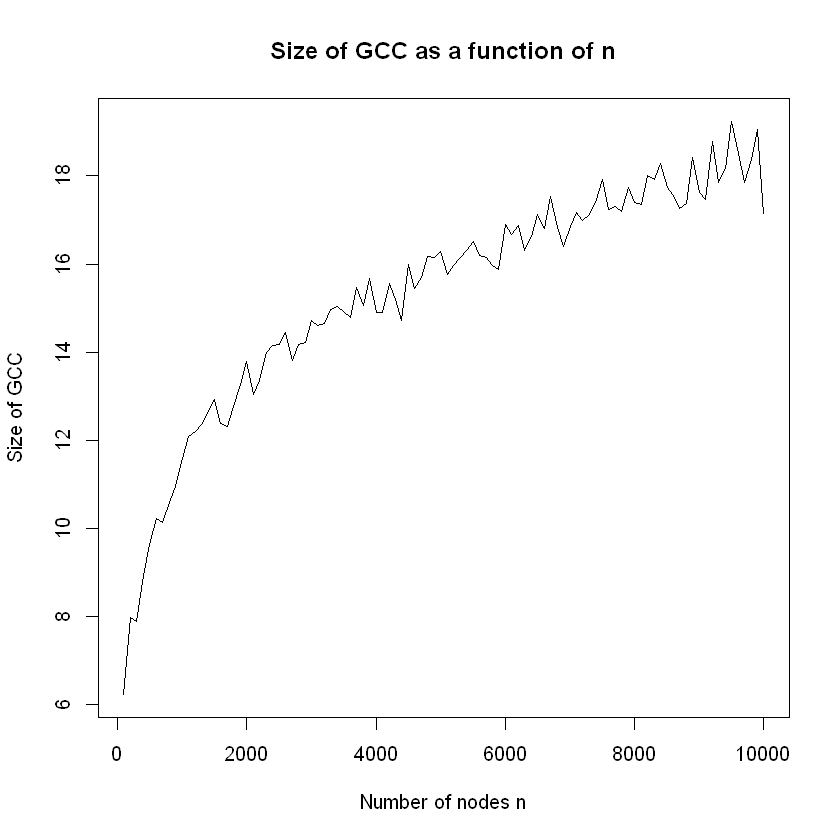

In [59]:
#Question 1d(i)
c <- 0.5
expected_gcc_size <- c()
n <- seq(100, 10000, 100)
for(i in n){

    gcc_size <- c()
    for(j in 1:100){
        p <- c / i
        network <- sample_gnp(i, p, directed = FALSE)
        gcc_size <- c(gcc_size, max(clusters(network)$csize))
    
    }
    
    expected_gcc_size <- c(expected_gcc_size, mean(gcc_size))
    
}
plot(x = n , y = expected_gcc_size, 'line', xlab='Number of nodes n',ylab='Size of GCC',main='Size of GCC as a function of n')

Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"

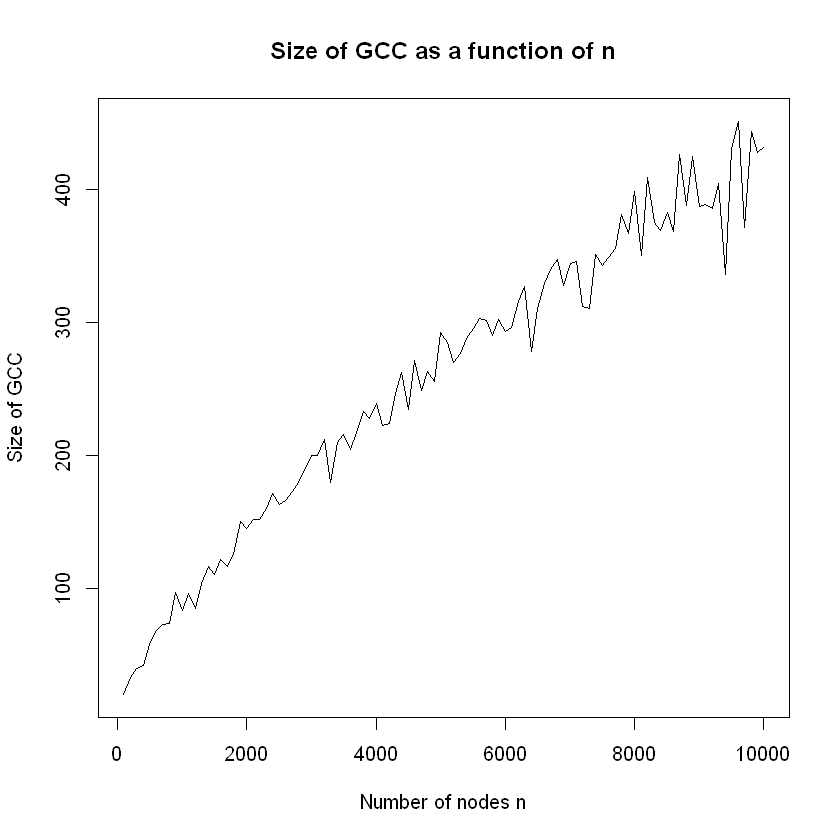

In [60]:
#Question 1d(ii)
c <- 1
expected_gcc_size <- c()
n <- seq(100, 10000, 100)
for(i in n){

    gcc_size <- c()
    for(j in 1:100){
        p <- c / i
        network <- sample_gnp(i, p, directed = FALSE)
        gcc_size <- c(gcc_size, max(clusters(network)$csize))
    
    }
    
    expected_gcc_size <- c(expected_gcc_size, mean(gcc_size))
    
}
plot(x = n , y = expected_gcc_size, 'line', xlab='Number of nodes n',ylab='Size of GCC',main='Size of GCC as a function of n')

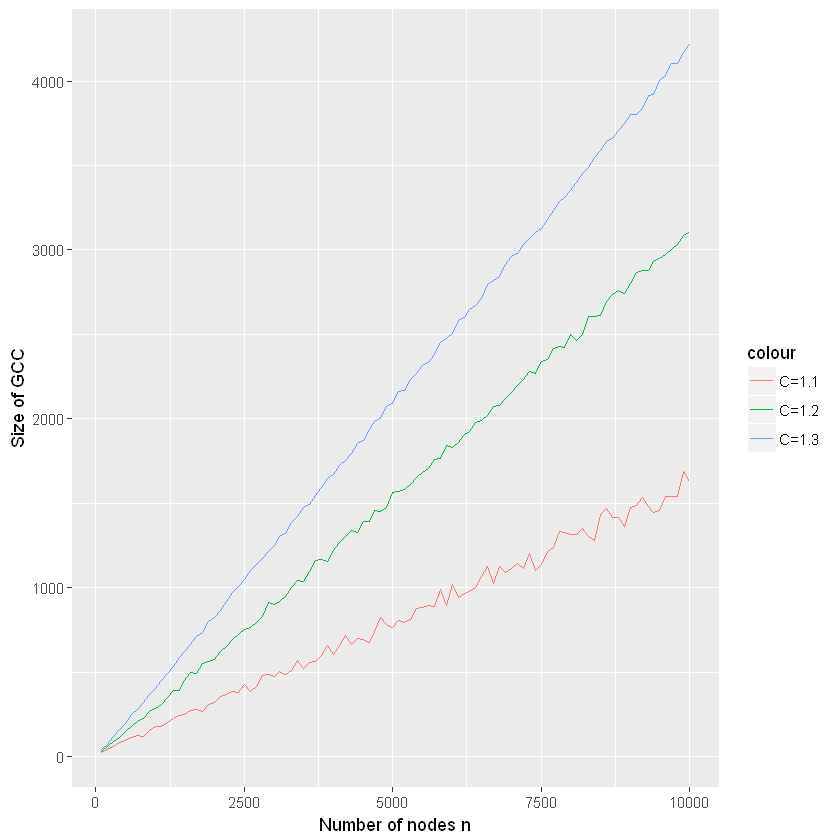

In [63]:
#Question 1d(iii)
length = 100
n_seq <- seq(from = 100, to = 10000, length.out = length)
gcc_size <- matrix(nrow=3,ncol=length)
j<-1
for (c in c(1.1,1.2,1.3)){
  i<- 1
  for (n in n_seq){
      gcc <- c()
      for (k in 1:100){
        p <- c/n
        q = erdos.renyi.game(n,p=p,directed = F)
        gcc <- c(gcc, max(clusters(q)$csize))
          }
      gcc_size[[j,i]] <- mean(gcc)
      i <- i+1
  }
  j <- j+1
}
gcc <- data.frame(t(gcc_size))
gcc$n_seq <- n_seq
ggplot(data = gcc,aes(gcc$n_seq)) + 
  geom_line(aes(y=gcc$X1,colour = 'C=1.1')) +
  geom_line(aes(y=gcc$X2,colour = 'C=1.2')) +
  geom_line(aes(y=gcc$X3,colour = 'C=1.3')) + 
  labs(x = 'Number of nodes n', y='Size of GCC')

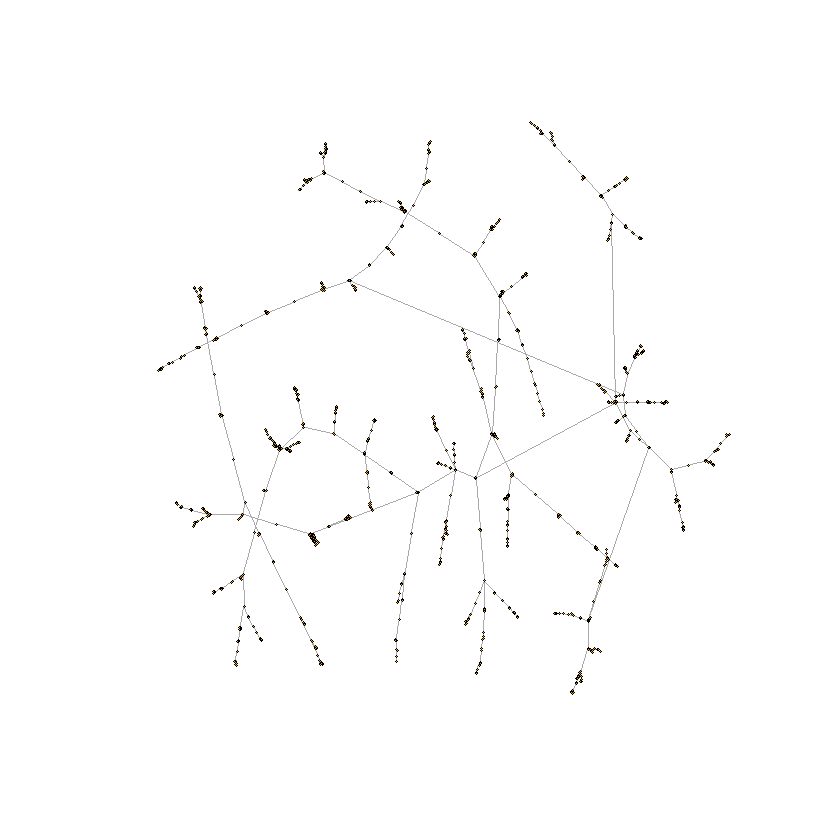

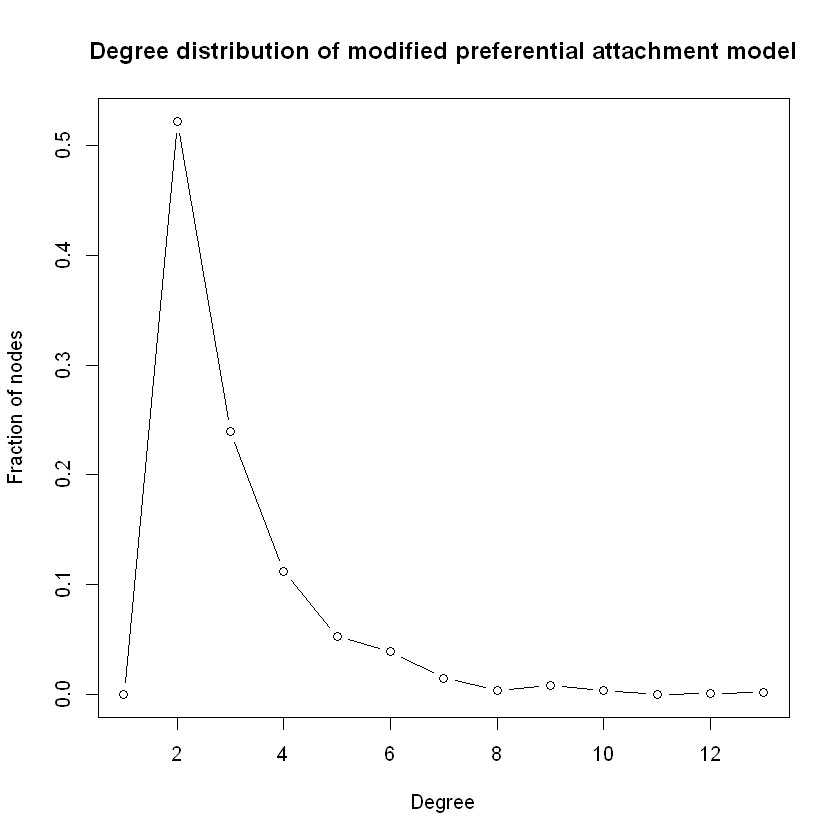

log_data$lind 
    -3.369215 


$continuous
[1] FALSE

$alpha
[1] 4.802137

$xmin
[1] 5

$logLik
[1] -107.7273

$KS.stat
[1] 0.05877315

$KS.p
[1] 0.9625482

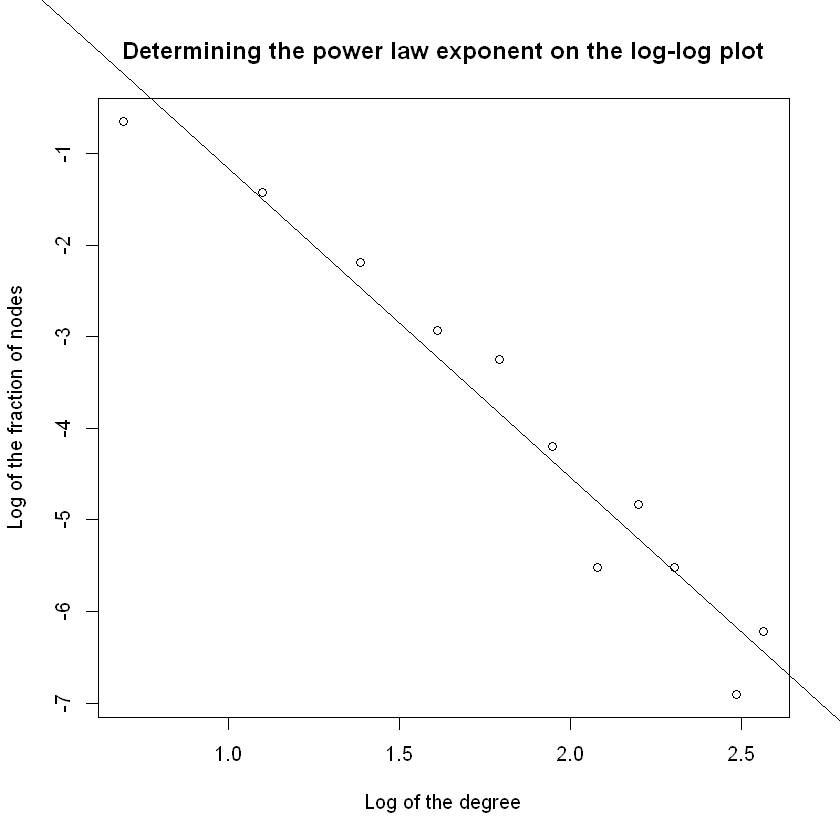

In [23]:
#Question 1.3a
g <- sample_pa_age(1000, pa.exp=1, aging.exp = -1, m = 1, aging.bin = 300, directed = F,
                   zero.deg.appeal = 1, zero.age.appeal = 0, deg.coef = 1, age.coef = 1)
plot(g, vertex.size=1, vertex.label=NA)
deg_dist = degree.distribution(g)
deg = degree(g)
plot(x=seq(length(deg_dist)),deg_dist,'b',main='Degree distribution of modified preferential attachment model',
     xlab='Degree',ylab='Fraction of nodes')


ind = seq(length(deg_dist))
ldeg = log(deg_dist)
lind = log(ind)
log_data = data.frame(lind,ldeg)
log_data = log_data[is.finite(rowSums(log_data)),]
fit = lm(formula = log_data$ldeg ~ log_data$lind)
plot(log_data$lind,log_data$ldeg,main='Determining the power law exponent on the log-log plot',
    xlab = 'Log of the degree',ylab='Log of the fraction of nodes')
abline(fit)
power_exp = coef(fit)[2]
print(power_exp)

fit_power_law(deg)

[1] "The number of structures in the graph is 31"
[1] "The modularity of the community structure is 0.935345756166581"


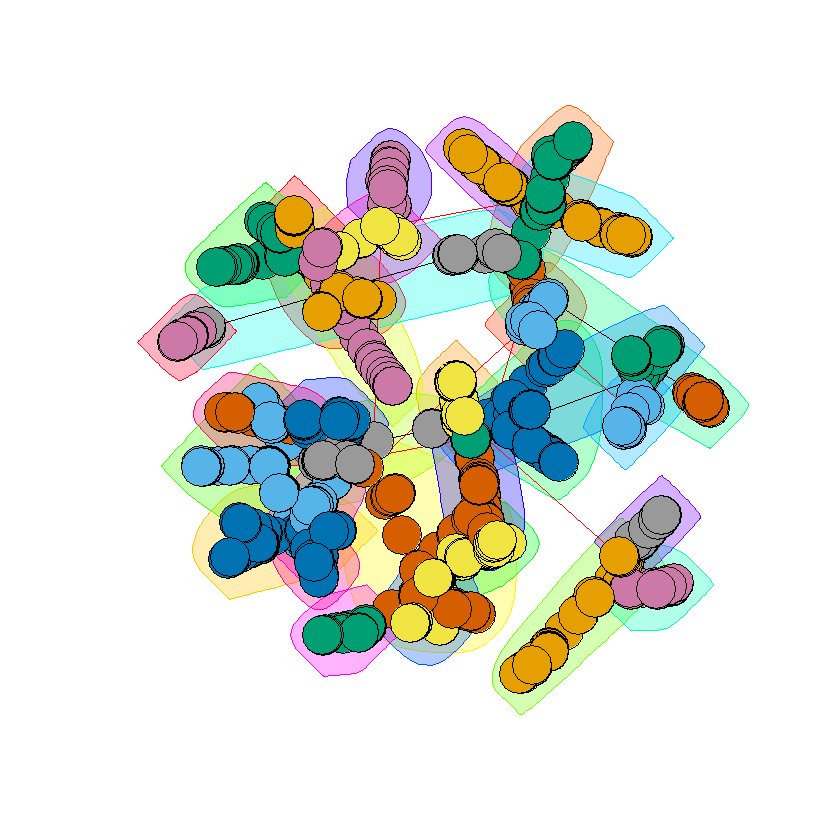

In [32]:
#Question 1.3b
comm = cluster_fast_greedy(g)
print(paste("The number of structures in the graph is",length(comm)))
print(paste("The modularity of the community structure is",modularity(comm)))
plot(comm,g,vertex.label=NA)

In [47]:
#Question 2.1b (Estimating the probability of connection)
num_trials = 100
for (p in c(0.003,0.004,0.01,0.05,0.1)){
    con=0
    for (i in seq(num_trials)){
        q = erdos.renyi.game(1000,p=p,directed = F)
        if(is.connected(q)){
            con = con + 1
        }
    }
    print(p)
    print(paste('The probability of connected network is', con/num_trials))
}

[1] 0.003
[1] "The probability of connected network is 0"
[1] 0.004
[1] "The probability of connected network is 0"
[1] 0.01
[1] "The probability of connected network is 0.95"
[1] 0.05
[1] "The probability of connected network is 1"
[1] 0.1
[1] "The probability of connected network is 1"
